In [1]:
import cv2
import numpy as np
import math
import io
from IPython.display import Image, display

In [2]:
def openImage():
    return cv2.imread("../images/nestle.jpeg")

def displayImage(img, fmt='.jpeg'):
    display(Image(cv2.imencode(fmt, img)[1].tostring()))

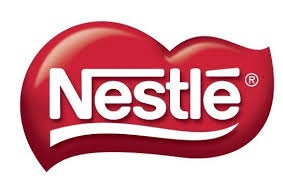

In [3]:
displayImage(openImage())

In [4]:
image = openImage()

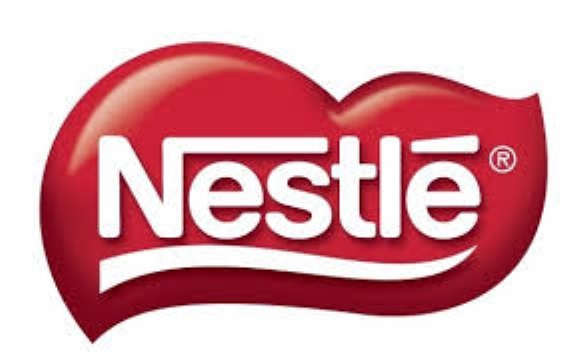

In [5]:
def scale_row(image, scale=2):
    return np.moveaxis(np.asarray([
        np.vstack([
                np.linspace(image[i,:,channel], image[i+1,:,channel], 2 + scale - 1)[:-1,:]
                for i in range(image[...,channel].shape[0] - 1)])
        for channel in range(image.shape[2])
    ]), 0, -1)

def scale_image_k_points(image, scale=2):
    return np.clip(scale_row(scale_row(image).swapaxes(0,1)).swapaxes(0,1), 0, 255).astype(np.uint8)

displayImage(scale_image_k_points(openImage()))

### *A followup challenge: Instead of scaling the entire image, just take a pivot point, enlarge from that and keep the original image size same. (view port scaling)*